<a href="https://colab.research.google.com/github/Pradeep-192006/Computer-vision-/blob/main/Gaussian_and_Laplacian.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
from google.colab import files
uploaded = files.upload()

Saving IMG-20260125-WA0004.jpg to IMG-20260125-WA0004.jpg


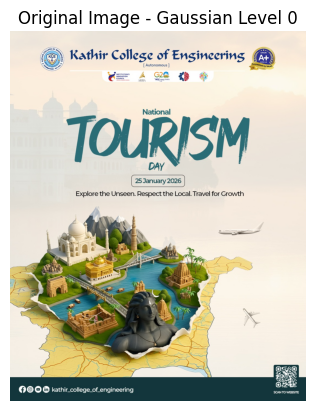

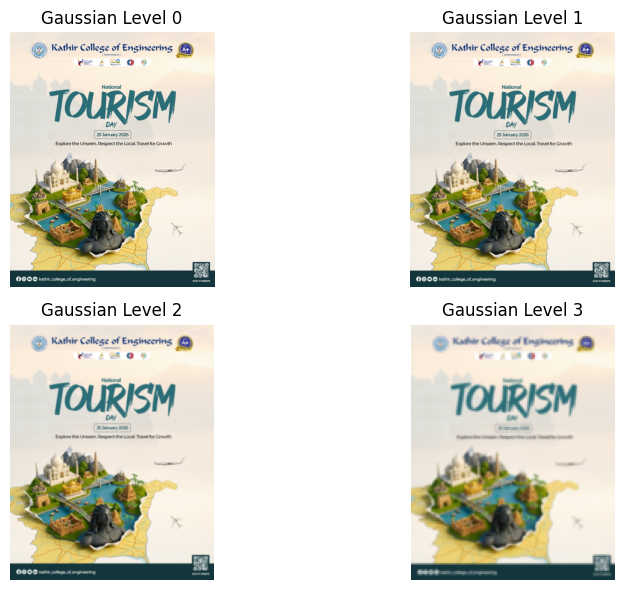

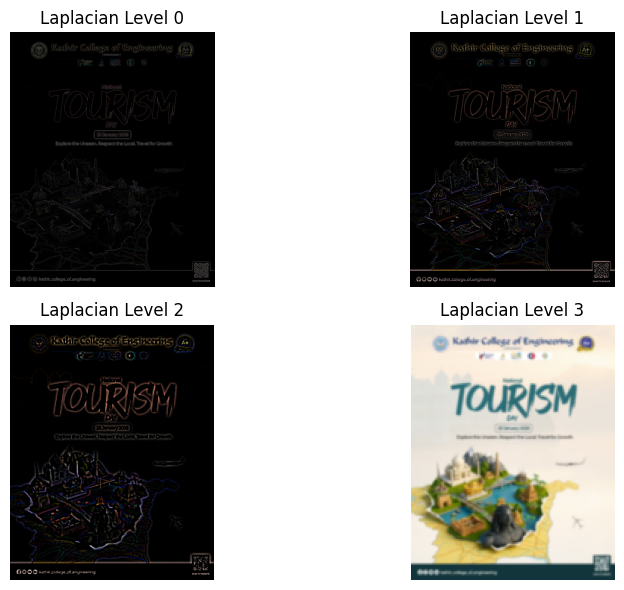

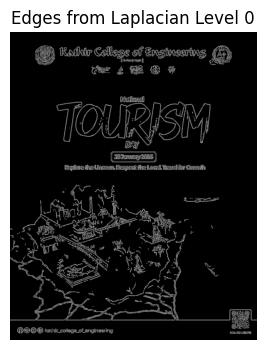

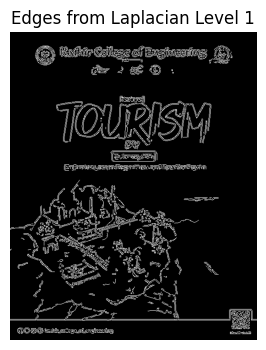

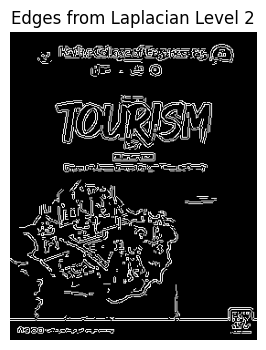

In [7]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

# ---------- Step 1: Read Image ----------
img = cv2.imread("IMG-20260125-WA0004.jpg")

# Safety check (IMPORTANT)
if img is None:
    raise FileNotFoundError("input.jpg not found. Check file name/path.")

# Convert BGR to RGB
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# ---------- Step 2: Display Original Image ----------
plt.imshow(img)
plt.title("Original Image - Gaussian Level 0")
plt.axis("off")
plt.show()

# ---------- Step 3: Construct Gaussian Pyramid ----------
G = [img]
for i in range(3):
    G.append(cv2.pyrDown(G[i]))

plt.figure(figsize=(10, 6))
for i in range(len(G)):
    plt.subplot(2, 2, i + 1)
    plt.imshow(G[i])
    plt.title(f"Gaussian Level {i}")
    plt.axis("off")
plt.tight_layout()
plt.show()

# ---------- Step 4: Construct Laplacian Pyramid ----------
L = []
for i in range(len(G) - 1):
    expanded = cv2.pyrUp(G[i + 1])

    # Fix size mismatch error
    expanded = cv2.resize(expanded, (G[i].shape[1], G[i].shape[0]))

    laplacian = cv2.subtract(G[i], expanded)
    L.append(laplacian)

L.append(G[-1])  # Last Gaussian level

# ---------- Step 5: Display Laplacian Pyramid ----------
plt.figure(figsize=(10, 6))
for i in range(len(L)):
    plt.subplot(2, 2, i + 1)

    # Normalize for correct visualization
    lap_norm = cv2.normalize(L[i], None, 0, 255, cv2.NORM_MINMAX)
    lap_norm = lap_norm.astype(np.uint8)

    plt.imshow(lap_norm)
    plt.title(f"Laplacian Level {i}")
    plt.axis("off")
plt.tight_layout()
plt.show()

# ---------- Step 6: Edge Detection on Laplacian ----------
for i, im in enumerate(L[:-1]):

    # Convert safely to grayscale
    lap_norm = cv2.normalize(im, None, 0, 255, cv2.NORM_MINMAX)
    lap_norm = lap_norm.astype(np.uint8)

    gray = cv2.cvtColor(lap_norm, cv2.COLOR_RGB2GRAY)
    edges = cv2.Canny(gray, 100, 200)

    plt.figure(figsize=(4, 4))
    plt.imshow(edges, cmap="gray")
    plt.title(f"Edges from Laplacian Level {i}")
    plt.axis("off")
    plt.show()